In [616]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from pandas import datetime
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
#import other useful libraries 




<ipython-input-616-3a4821aa0ab9>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In this assignment, you will be using data from the real world (almost) to identify and predict the pattern in closing stock price of a company for each day in 2022. Load the dataset saved as **output.csv** in the github repo and do the following : 

a) Plot the acf and pacf graphs to identify the process and its order 
b) Use a linear regression model to find the coefficients of this process once you know the order 

**optional** : If you're unable to figure out the order in one go, play around with different lag values and check for the model that gives the best score. 
(use r2_score etc for this) 

**c) Create additional entries in the same dataframe which correspond to the first month of 2023 and then predict the closing stock price for each day of this month. Save your results in your github repo**



In [617]:
#load the dataset
url = 'https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/output.csv'
df = pd.read_csv(url)

In [618]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [619]:
df.head()

,Date,Prices
0,2022-01-01,99.346617
1,2022-01-02,99.563825
2,2022-01-03,100.163220
3,2022-01-04,99.841533
4,2022-01-05,101.927683


In [620]:
df["Date"]= pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)

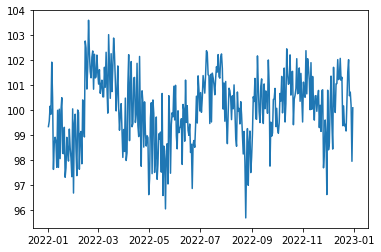

In [621]:
plt.plot(df.Prices)

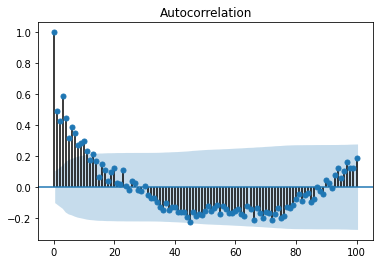

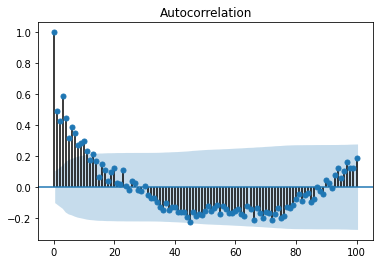

In [622]:
plot_acf(df.Prices,lags=100)


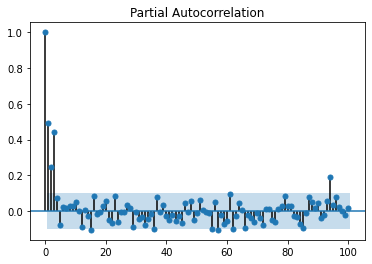

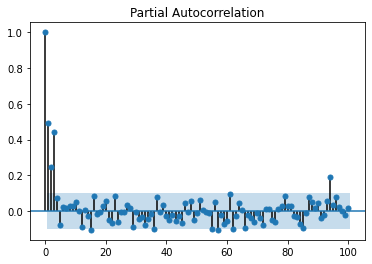

In [623]:
plot_pacf(df.Prices,lags=100)

In [624]:
df['a']=df.Prices.shift(1,axis=0)
df['b']=df.Prices.shift(2,axis=0)
df['c']=df.Prices.shift(3,axis=0)

In [625]:
df=df.dropna()

In [626]:
A=df[['a','b','c']]
B=df['Prices']

In [627]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2,random_state=51)

In [628]:

lm=LinearRegression()
lm.fit(A_train, B_train)
lm.score(A_test,B_test)

0.47974617988374013

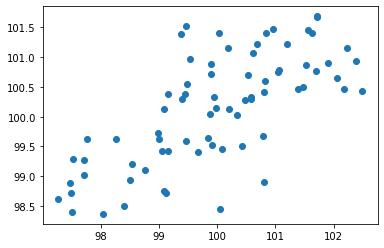

In [629]:
prediction=lm.predict(A_test)
plt.scatter(B_test,prediction)


In [630]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from pandas import datetime
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA

<ipython-input-630-41cf6bcbcd15>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [631]:
first_diffs=df.Prices.values[1:]-df.Prices.values[:-1]
first_diffs=np.concatenate([first_diffs,[0]])

In [632]:
df['FirstDifference']=first_diffs

In [633]:
df.head()

,Prices,a,b,c,FirstDifference
Date,,,,,
2022-01-04,99.841533,100.163220,99.563825,99.346617,2.086150
2022-01-05,101.927683,99.841533,100.163220,99.563825,-1.426586
2022-01-06,100.501097,101.927683,99.841533,100.163220,-2.868420
2022-01-07,97.632678,100.501097,101.927683,99.841533,1.027867
2022-01-08,98.660545,97.632678,100.501097,101.927683,0.259686


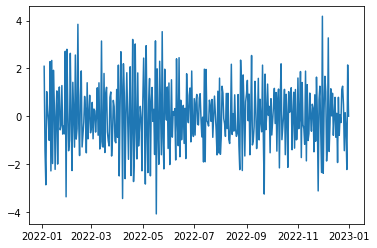

In [634]:
plt.plot(df.FirstDifference)

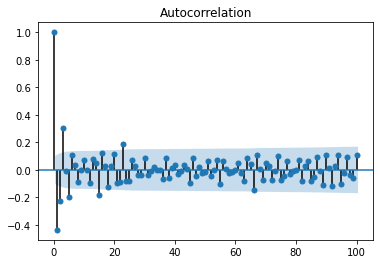

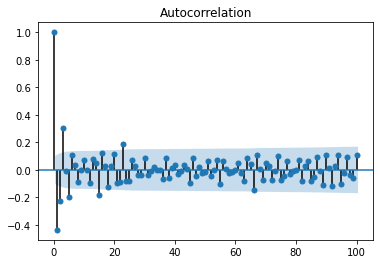

In [635]:
#plot the acf and pacf 
plot_acf(df.FirstDifference,lags=100)


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


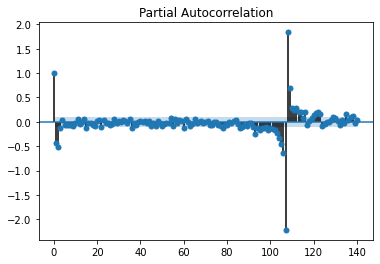

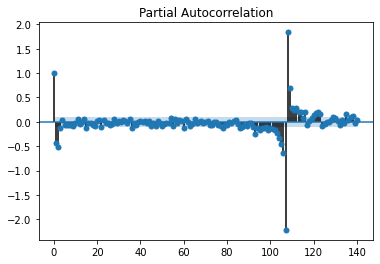

In [636]:
plot_pacf(df.FirstDifference,lags=140)

In [637]:
#it looks like an AR Process of order x, so we will train our regression till x lags 
df['t']=df.FirstDifference.shift(1,axis=0)
df['u']=df.FirstDifference.shift(2,axis=0)
#use the df.shift function to get a lag of 1,2....x

In [638]:

df=df.dropna()

It looks like an AR Process of order 2

In [639]:
df.head()

,Prices,a,b,c,FirstDifference,t,u
Date,,,,,,,
2022-01-06,100.501097,101.927683,99.841533,100.163220,-2.868420,-1.426586,2.086150
2022-01-07,97.632678,100.501097,101.927683,99.841533,1.027867,-2.868420,-1.426586
2022-01-08,98.660545,97.632678,100.501097,101.927683,0.259686,1.027867,-2.868420
2022-01-09,98.920231,98.660545,97.632678,100.501097,-0.192849,0.259686,1.027867
2022-01-10,98.727382,98.920231,98.660545,97.632678,-1.010637,-0.192849,0.259686


In [640]:

#perform data cleaning and define dependent and independent variables
X=df[['t','u']]
Y=df['FirstDifference']


In [641]:
#define train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=51)


In [642]:
#define and fit your model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test,Y_test)

0.4488250664250081

In [643]:
#get results!! 

In [644]:
#run and plot the predictions for the predicted and test values to visualize the model

In [645]:
#calculate the r2 score and comment on the model performance

There is a much simpler way of doing this via the statsmodel library instead of the sklearn library. Try doing the same here!

In [646]:
from statsmodels.tsa.ar_model import AutoReg

In [647]:
train_data=df['FirstDifference'][:len(df)-60]
test_data=df['FirstDifference'][len(df)-60:]

In [648]:
model=AutoReg(train_data,lags=120).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


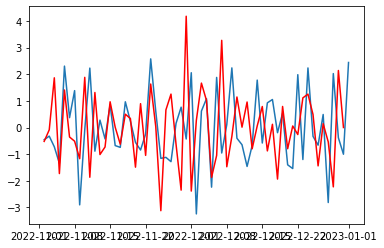

In [649]:
pred=model.predict(start=len(train_data),end=len(df))
plt.plot(pred)
plt.plot(test_data,color='red')